In [88]:
import warnings
warnings.filterwarnings("ignore")

In [160]:
def eig_charpoly(A):
    E = []
    pols = []
    eps = 1e-4
    n = A.dimensions()[0]

    p = A.charpoly()

    for a in range(n):
        A_a = A.delete_rows([a]).delete_columns([a])
        G_a = Graph(A_a)
        pa = A_a.charpoly()
        pols.append(pa)

    eigv = []
    for eig in A.eigenvalues():
        if(len(eigv)==0 or eig != eigv[-1]): eigv.append(float(eig))
    eigv.sort()
            
    for a in range(n):        
        for r in range(len(eigv)):
            eig = eigv[r]

            # Diagonal
            if(len(E) <= r):
                E.append(Matrix(RR, n))

            np = pols[a]*(x-eig)/p
            E[r][a, a] = np(eig+eps)
            if(abs(E[r][a, a]) < eps): E[r][a, a] = 0
            # outras entradas
            for b in range(a+1, n):
                A_ab = A.delete_rows([a, b]).delete_columns([a, b])
                pab = A_ab.charpoly()

                np = sqrt(pols[a]*pols[b] - pab*p) *(x-eig) / p

                E[r][a, b] = E[r][b, a] = np(eig+eps)
                if(abs(E[r][a, b]) < eps): E[r][a, b] = E[r][b, a] = 0
    return E

In [171]:
def eig_matching(A):
    E = []
    pols = []
    eps = 1e-6
    n = A.dimensions()[0]

    p = Graph(A).matching_polynomial()

    for a in range(n):
        A_a = A.delete_rows([a]).delete_columns([a])
        pa = Graph(A_a).matching_polynomial()
        pols.append(pa)

    eigv = p.real_roots()
    for a in range(n):        
        for r in range(len(eigv)):
            eig = eigv[r]

            # Diagonal
            if(len(E) <= r):
                E.append(Matrix(RR, n))

            np = pols[a]*(x-eig)/p
            E[r][a, a] = np(eig+eps)
            if(abs(E[r][a, a]) < eps): E[r][a, a] = 0

            # outras entradas
            for b in range(a+1, n):
                A_ab = A.delete_rows([a, b]).delete_columns([a, b])
                pab = Graph(A_ab).matching_polynomial()

                np = sqrt(pols[a]*pols[b] - pab*p) *(x-eig) / p

                E[r][a, b] = E[r][b, a] = np(eig+eps)
                if(abs(E[r][a, b]) < eps): E[r][a, b] = E[r][b, a] = 0
    return E

## Running at trees

In [124]:
from sage.graphs.trees import TreeIterator

In [332]:
n = 2
r = 5
for i in range(n, n+r):
    print(f"Trying graphs with {i} vertices")
    cnt = 0
    for t in TreeIterator(i):
        cnt+=1
        A = t.adjacency_matrix()
        E1 = eig_charpoly(A)
        E2 = eig_matching(A)

        for i in range(len(E1)):
            if(E1[i]!=E2[i]):
                print(Graph(A).matching_polynomial().real_roots())
                print(cnt, "DIFF")
                print(N(E1[i], digits=2))
                print()
                print(N(E2[i], digits=2))
                print()
                break;

Trying graphs with 2 vertices
[-1.00000000000000, 1.00000000000000]
1 DIFF
[ 0.50 -0.50]
[-0.50  0.50]

[ 0.50 -0.50]
[-0.50  0.50]

Trying graphs with 3 vertices
[-1.41421356237310, 0.000000000000000, 1.41421356237310]
1 DIFF
[ 0.50 -0.35 -0.35]
[-0.35  0.25  0.25]
[-0.35  0.25  0.25]

[ 0.50 -0.35 -0.35]
[-0.35  0.25  0.25]
[-0.35  0.25  0.25]

Trying graphs with 4 vertices
[-1.61803398874989, -0.618033988749895, 0.618033988749895, 1.61803398874989]
1 DIFF
[ 0.36 -0.36  0.22 -0.22]
[-0.36  0.36 -0.22  0.22]
[ 0.22 -0.22  0.14 -0.14]
[-0.22  0.22 -0.14  0.14]

[ 0.36 -0.36  0.22 -0.22]
[-0.36  0.36 -0.22  0.22]
[ 0.22 -0.22  0.14 -0.14]
[-0.22  0.22 -0.14  0.14]

[-1.73205080756888, 0.000000000000000, 1.73205080756888]
2 DIFF
[ 0.50 -0.29 -0.29 -0.29]
[-0.29  0.17  0.17  0.17]
[-0.29  0.17  0.17  0.17]
[-0.29  0.17  0.17  0.17]

[ 0.50 -0.29 -0.29 -0.29]
[-0.29  0.17  0.17  0.17]
[-0.29  0.17  0.17  0.17]
[-0.29  0.17  0.17  0.17]

Trying graphs with 5 vertices
[-1.73205080756888, -1.

## Tring at graphs that the matching polynomial is different from the characteristic polynomial

## Cycles

In [328]:
def plot_idempotents(G):
    A = G.adjacency_matrix()
    print("Idempotents relative to characteristic polynomial")
    for e in eig_charpoly(A):
        print(N(e, digits=2))
        print()
    print()
    
    B = matrix(RR, A.dimensions()[0])
    C = matrix(RR, A.dimensions()[0])
    
    E = eig_matching(A)
    eigv = G.matching_polynomial().real_roots()
    
    print("Idempotents relative to matching polynomial")
    for i in range(len(E)):
        e = E[i]
        print(N(e, digits=2))
        print()
        B += e
        C += eigv[i]*e
    print()
    
    print("Multiple")
    for i in range(1, len(E)):
        e = E[i]
        print(N(E[0]*e, digits=2))
        print()
    print()
    
    print("Idempotents squared")
    for i in range(len(E)):
        e = E[i]
        print(N(e*e, digits=2))
        print()
    print()
    
    
    print("Sum of the idempotents:")
    print(N(B, digits=2))
    print()
    
    
    print("Roots of:", G.matching_polynomial())
    print(eigv)
    print()
    print("Sum of the idempotents times the roots:")
    print(N(C, digits=2))
    print()


### C_3

In [329]:
c3 = {0:[1], 1:[2], 2:[0]}
plot_idempotents(Graph(c3))

Idempotents relative to characteristic polynomial
[ 0.67 -0.33 -0.33]
[-0.33  0.67 -0.33]
[-0.33 -0.33  0.67]

[0.33 0.33 0.33]
[0.33 0.33 0.33]
[0.33 0.33 0.33]


Idempotents relative to matching polynomial
[0.33 0.33 0.33]
[0.33 0.33 0.33]
[0.33 0.33 0.33]

[ 0.33 -0.33 -0.33]
[-0.33  0.33 -0.33]
[-0.33 -0.33  0.33]

[0.33 0.33 0.33]
[0.33 0.33 0.33]
[0.33 0.33 0.33]


Multiple
[-0.11 -0.11 -0.11]
[-0.11 -0.11 -0.11]
[-0.11 -0.11 -0.11]

[0.33 0.33 0.33]
[0.33 0.33 0.33]
[0.33 0.33 0.33]


Idempotents squared
[0.33 0.33 0.33]
[0.33 0.33 0.33]
[0.33 0.33 0.33]

[ 0.33 -0.11 -0.11]
[-0.11  0.33 -0.11]
[-0.11 -0.11  0.33]

[0.33 0.33 0.33]
[0.33 0.33 0.33]
[0.33 0.33 0.33]


Sum of the idempotents:
[ 1.0 0.33 0.33]
[0.33  1.0 0.33]
[0.33 0.33  1.0]

Roots of: x^3 - 3*x
[-1.73205080756888, 0.000000000000000, 1.73205080756888]

Sum of the idempotents times the roots:
[ 1.0e-6 -5.0e-7 -5.0e-7]
[-5.0e-7  1.0e-6 -5.0e-7]
[-5.0e-7 -5.0e-7  1.0e-6]



### C_4

In [330]:
c4 = {0:[1], 1:[2], 2:[3], 3:[0]}
plot_idempotents(Graph(c4))

Idempotents relative to characteristic polynomial
[ 0.25 -0.25  0.25 -0.25]
[-0.25  0.25 -0.25  0.25]
[ 0.25 -0.25  0.25 -0.25]
[-0.25  0.25 -0.25  0.25]

[ 0.50  0.00 -0.50  0.00]
[ 0.00  0.50  0.00 -0.50]
[-0.50  0.00  0.50  0.00]
[ 0.00 -0.50  0.00  0.50]

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


Idempotents relative to matching polynomial
[ 0.25 -0.25 -0.25 -0.25]
[-0.25  0.25 -0.25 -0.25]
[-0.25 -0.25  0.25 -0.25]
[-0.25 -0.25 -0.25  0.25]

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]

[ 0.25 -0.25 -0.25 -0.25]
[-0.25  0.25 -0.25 -0.25]
[-0.25 -0.25  0.25 -0.25]
[-0.25 -0.25 -0.25  0.25]

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


Multiple
[-0.12 -0.12 -0.12 -0.12]
[-0.12 -0.12 -0.12 -0.12]
[-0.12 -0.12 -0.12 -0.12]
[-0.12 -0.12 -0.12 -0.12]

[   0.25  2.3e-7 -9.6e-8  2.3e-7]
[ 2.3e-7    0.25  2.3e-7 -9.6e-8]
[-9.6e-8  2.3e-7    0.25  2.3e-7]
[

### C_5

In [331]:
c5 = {0:[1], 1:[2], 2:[3], 3:[4], 4:[0]}
plot_idempotents(Graph(c5))

Idempotents relative to characteristic polynomial
[ 0.40 -0.32  0.12  0.12 -0.32]
[-0.32  0.40 -0.32  0.12  0.12]
[ 0.12 -0.32  0.40 -0.32  0.12]
[ 0.12  0.12 -0.32  0.40 -0.32]
[-0.32  0.12  0.12 -0.32  0.40]

[ 0.40  0.12 -0.32 -0.32  0.12]
[ 0.12  0.40  0.12 -0.32 -0.32]
[-0.32  0.12  0.40  0.12 -0.32]
[-0.32 -0.32  0.12  0.40  0.12]
[ 0.12 -0.32 -0.32  0.12  0.40]

[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]


Idempotents relative to matching polynomial
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]

[ 0.20 -0.20 -0.20 -0.20 -0.20]
[-0.20  0.20 -0.20 -0.20 -0.20]
[-0.20 -0.20  0.20 -0.20 -0.20]
[-0.20 -0.20 -0.20  0.20 -0.20]
[-0.20 -0.20 -0.20 -0.20  0.20]

[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]

[ 0.20 -0.20 -

In [325]:
c6 = C(8)
plot_idempotents(Graph(c6))

Idempotents relative to characteristic polynomial
[ 0.019 -0.036  0.050 -0.059  0.062 -0.059  0.050 -0.036  0.019]
[-0.036  0.069 -0.095   0.11  -0.12   0.11 -0.095  0.069 -0.036]
[ 0.050 -0.095   0.13  -0.15   0.16  -0.15   0.13 -0.095  0.050]
[-0.059   0.11  -0.15   0.18  -0.19   0.18  -0.15   0.11 -0.059]
[ 0.062  -0.12   0.16  -0.19   0.20  -0.19   0.16  -0.12  0.062]
[-0.059   0.11  -0.15   0.18  -0.19   0.18  -0.15   0.11 -0.059]
[ 0.050 -0.095   0.13  -0.15   0.16  -0.15   0.13 -0.095  0.050]
[-0.036  0.069 -0.095   0.11  -0.12   0.11 -0.095  0.069 -0.036]
[ 0.019 -0.036  0.050 -0.059  0.062 -0.059  0.050 -0.036  0.019]

[ 0.069  -0.11   0.11 -0.069   0.00  0.069  -0.11   0.11 -0.069]
[ -0.11   0.18  -0.18   0.11   0.00  -0.11   0.18  -0.18   0.11]
[  0.11  -0.18   0.18  -0.11   0.00   0.11  -0.18   0.18  -0.11]
[-0.069   0.11  -0.11  0.069   0.00 -0.069   0.11  -0.11  0.069]
[  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00]
[ 0.069  -0.11   0.11 -0.069   0.00  0.

### C_10

In [254]:
def C(n):
    c = {}
    for i in range(n):
        c[i] = [(i+1)%10]
    return c

In [255]:
c10 = C(10)
plot_idempotents(Graph(c10))

Idempotents relative to characteristic polynomial
[ 0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10]
[-0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10]
[ 0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10]
[-0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10]
[ 0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10]
[-0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10]
[ 0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10]
[-0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10]
[ 0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10]
[-0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10 -0.10  0.10]

[ 0.20 -0.16 0.062 0.062 -0.16  0.20 -0.16 0.062 0.062 -0.16]
[-0.16  0.20 -0.16 0.062 0.062 -0.16  0.20 -0.16 0.062 0.062]
[0.062 -0.16  0.20 -0.16 0.062 0.062 -0.16  0.20 -0.16 0.062]
[0.062 0.062 -0.16  0.20 -0.16 0.062 0.062 -0.16  0.20 -0.16]
[-0.16 0.062 0.062 -0.16  0.20 -0.16 0.062 0.062 -0.16  0.20]
[ 0.20 -0.16 0.062 

## Complete Graphs

### K_4

In [252]:
k4 = {0:[1, 2, 3], 1:[2, 3], 2:[3]}
plot_idempotents(Graph(k4))

Idempotents relative to characteristic polynomial
[ 0.75 -0.25 -0.25 -0.25]
[-0.25  0.75 -0.25 -0.25]
[-0.25 -0.25  0.75 -0.25]
[-0.25 -0.25 -0.25  0.75]

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


Idempotents relative to matching polynomial
[ 0.25 -0.25 -0.25 -0.25]
[-0.25  0.25 -0.25 -0.25]
[-0.25 -0.25  0.25 -0.25]
[-0.25 -0.25 -0.25  0.25]

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]

[ 0.25 -0.25 -0.25 -0.25]
[-0.25  0.25 -0.25 -0.25]
[-0.25 -0.25  0.25 -0.25]
[-0.25 -0.25 -0.25  0.25]

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


Idempotents squared
[  0.25 1.9e-7 1.9e-7 1.9e-7]
[1.9e-7   0.25 1.9e-7 1.9e-7]
[1.9e-7 1.9e-7   0.25 1.9e-7]
[1.9e-7 1.9e-7 1.9e-7   0.25]

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]

[   0.25 -6.2e-8 -6.2e-8 -6.2e-8]
[-6.2e-8    0.25 -6.2e-8 -6.2e-8]
[-6.2e-8 -6.2e-8    0.25

### K_5

In [256]:
k5 = {0:[1, 2, 3, 4], 1:[2, 3, 4], 2:[3, 4], 3:[4]}
plot_idempotents(Graph(k5))

Idempotents relative to characteristic polynomial
[  0.15 -0.038 -0.038 -0.038 -0.038]
[-0.038   0.15 -0.038 -0.038 -0.038]
[-0.038 -0.038   0.15 -0.038 -0.038]
[-0.038 -0.038 -0.038   0.15 -0.038]
[-0.038 -0.038 -0.038 -0.038   0.15]

[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]


Idempotents relative to matching polynomial
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]

[ 0.20 -0.20 -0.20 -0.20 -0.20]
[-0.20  0.20 -0.20 -0.20 -0.20]
[-0.20 -0.20  0.20 -0.20 -0.20]
[-0.20 -0.20 -0.20  0.20 -0.20]
[-0.20 -0.20 -0.20 -0.20  0.20]

[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]
[0.20 0.20 0.20 0.20 0.20]

[ 0.20 -0.20 -0.20 -0.20 -0.20]
[-0.20  0.20 -0.20 -0.20 -0.20]
[-0.20 -0.20  0.20 -0.20 -0.20]
[-0.20 -0.20 -0.20  0.20 -0.20]
[-0.20 -0.20 -0.20 -0.

### K_10

In [257]:
def K(n):
    k = {}
    for i in range(n):
        k[i] = []
        for j in range(i+1, n):
            k[i].append(j)
    return k

In [258]:
k10 = K(10)
plot_idempotents(Graph(k10))

Idempotents relative to characteristic polynomial
[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]

[0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10]
[0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10]
[0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10]
[0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10]
[0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10]
[0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10]
[0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10]
[0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10 0.10]
[0.10 0.10 0.

## Random Graphs

### n=11 m=20

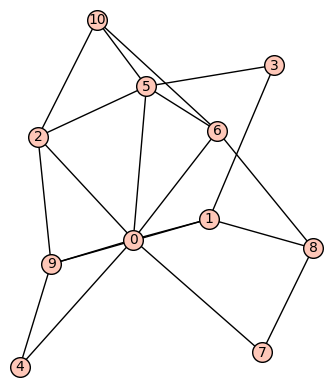

In [317]:
G = graphs.RandomGNM(11,20)
P = G.plot()
P.show()

In [318]:
plot_idempotents(G)

Idempotents relative to characteristic polynomial
[  0.27  -0.21  -0.14  0.091  -0.11 -0.058  -0.18  -0.15   0.18  0.065   0.13]
[ -0.21   0.16   0.11 -0.070  0.088  0.045   0.14   0.12  -0.14 -0.050 -0.099]
[ -0.14   0.11  0.070 -0.047  0.058  0.030  0.091  0.079 -0.094 -0.033 -0.065]
[ 0.091 -0.070 -0.047  0.031 -0.038 -0.020 -0.060 -0.052  0.062  0.022  0.043]
[ -0.11  0.088  0.058 -0.038  0.048  0.025  0.075  0.065 -0.078 -0.028 -0.054]
[-0.058  0.045  0.030 -0.020  0.025  0.013  0.039  0.034 -0.040 -0.014 -0.028]
[ -0.18   0.14  0.091 -0.060  0.075  0.039   0.12   0.10  -0.12 -0.043 -0.085]
[ -0.15   0.12  0.079 -0.052  0.065  0.034   0.10  0.089  -0.11 -0.038 -0.073]
[  0.18  -0.14 -0.094  0.062 -0.078 -0.040  -0.12  -0.11   0.13  0.045  0.088]
[ 0.065 -0.050 -0.033  0.022 -0.028 -0.014 -0.043 -0.038  0.045  0.016  0.031]
[  0.13 -0.099 -0.065  0.043 -0.054 -0.028 -0.085 -0.073  0.088  0.031  0.061]

[  0.028  -0.021   0.069   0.068  0.0084   -0.11   0.052 -0.0081  -0.012  -0.044

Idempotents relative to matching polynomial
[ 0.28  0.15  0.18 0.088  0.11  0.20  0.17  0.10 0.097  0.16  0.12]
[ 0.15 0.084 0.096 0.048 0.060  0.11 0.091 0.056 0.053 0.089 0.065]
[ 0.18 0.096  0.11 0.055 0.069  0.12  0.10 0.064 0.060  0.10 0.074]
[0.088 0.048 0.055 0.027 0.034 0.062 0.052 0.032 0.030 0.051 0.037]
[ 0.11 0.060 0.069 0.034 0.044 0.078 0.066 0.041 0.038 0.064 0.047]
[ 0.20  0.11  0.12 0.062 0.078  0.14  0.12 0.072 0.068  0.11 0.083]
[ 0.17 0.091  0.10 0.052 0.066  0.12 0.099 0.061 0.057 0.097 0.070]
[ 0.10 0.056 0.064 0.032 0.041 0.072 0.061 0.038 0.036 0.060 0.044]
[0.097 0.053 0.060 0.030 0.038 0.068 0.057 0.036 0.033 0.056 0.041]
[ 0.16 0.089  0.10 0.051 0.064  0.11 0.097 0.060 0.056 0.095 0.069]
[ 0.12 0.065 0.074 0.037 0.047 0.083 0.070 0.044 0.041 0.069 0.050]

[ 0.052 -0.083 -0.070 -0.057 -0.043 -0.085 -0.078 -0.043 -0.073 -0.075 -0.077]
[-0.083   0.13  -0.11 -0.092 -0.069  -0.14  -0.13 -0.068  -0.12  -0.12  -0.12]
[-0.070  -0.11  0.095 -0.078 -0.058  -0.12  -0.11

### n=10, m=20

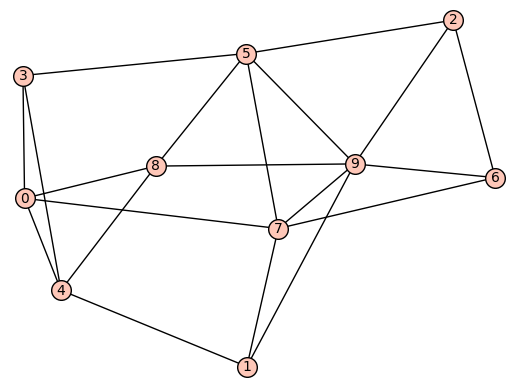

In [319]:
G = graphs.RandomGNM(10,20)
P = G.plot()
P.show()

In [320]:
plot_idempotents(G)

Idempotents relative to characteristic polynomial
[  0.15  0.035  -0.11  -0.13  0.032   0.18  0.086  -0.18  -0.15  0.046]
[ 0.035 0.0081 -0.026 -0.030 0.0076  0.043  0.020 -0.041 -0.034  0.011]
[ -0.11 -0.026  0.084  0.097 -0.024  -0.14 -0.065   0.13   0.11 -0.034]
[ -0.13 -0.030  0.097   0.11 -0.028  -0.16 -0.074   0.15   0.13 -0.040]
[ 0.032 0.0076 -0.024 -0.028 0.0069  0.040  0.019 -0.038 -0.031 0.0099]
[  0.18  0.043  -0.14  -0.16  0.040   0.23   0.11  -0.22  -0.18  0.057]
[ 0.086  0.020 -0.065 -0.074  0.019   0.11  0.050  -0.10 -0.084  0.027]
[ -0.18 -0.041   0.13   0.15 -0.038  -0.22  -0.10   0.21   0.17 -0.055]
[ -0.15 -0.034   0.11   0.13 -0.031  -0.18 -0.084   0.17   0.14 -0.045]
[ 0.046  0.011 -0.034 -0.040 0.0099  0.057  0.027 -0.055 -0.045  0.014]

[ 0.011  0.053 0.0048  0.014 -0.050 0.0069  0.029 -0.023  0.035 -0.047]
[ 0.053   0.27  0.025  0.073  -0.25  0.035   0.15  -0.12   0.18  -0.24]
[0.0048  0.025 0.0022 0.0067 -0.023 0.0032  0.013 -0.011  0.016 -0.022]
[ 0.014  0.07

### n=10, m=15

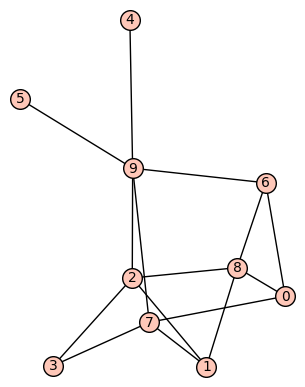

In [322]:
G = graphs.RandomGNM(10,15)
P = G.plot()
P.show()

In [323]:
plot_idempotents(G)

Idempotents relative to characteristic polynomial
[ 0.056  0.065 -0.094  0.070 -0.042 -0.042 -0.066  -0.11  0.013   0.12]
[ 0.065  0.076  -0.11  0.082 -0.049 -0.049 -0.077  -0.13  0.016   0.14]
[-0.094  -0.11   0.16  -0.12  0.071  0.071   0.11   0.18 -0.023  -0.21]
[ 0.070  0.082  -0.12  0.088 -0.053 -0.053 -0.083  -0.14  0.017   0.15]
[-0.042 -0.049  0.071 -0.053  0.032  0.032  0.050  0.082 -0.010 -0.092]
[-0.042 -0.049  0.071 -0.053  0.032  0.032  0.050  0.082 -0.010 -0.092]
[-0.066 -0.077   0.11 -0.083  0.050  0.050  0.078   0.13 -0.016  -0.14]
[ -0.11  -0.13   0.18  -0.14  0.082  0.082   0.13   0.21 -0.026  -0.24]
[ 0.013  0.016 -0.023  0.017 -0.010 -0.010 -0.016 -0.026 0.0032  0.029]
[  0.12   0.14  -0.21   0.15 -0.092 -0.092  -0.14  -0.24  0.029   0.27]

[   0.14    0.14   0.085   0.016   0.041   0.041   0.096   -0.11   -0.24  -0.078]
[   0.14    0.15   0.088   0.016   0.043   0.043    0.10   -0.12   -0.25  -0.081]
[  0.085   0.088   0.052  0.0097   0.025   0.025   0.059  -0.071 